In [17]:
# Import packages
import csv, sys, numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy.polynomial.polynomial as poly

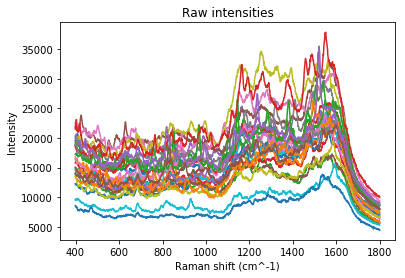

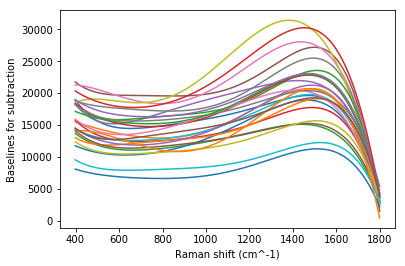

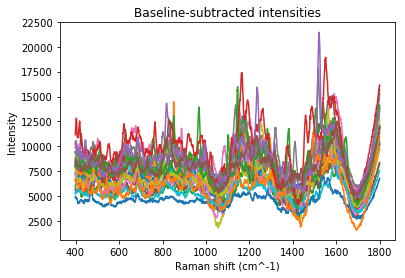

In [21]:
# Organize and plot raw data
rawdata = pd.read_csv('sers5au40.txt', delimiter="\t")
#to display all headers: print(list(rawdata.columns.values))
#shift = np.array(rawdata['ramanshift']) # name x-value array by the name of the header
shift = (rawdata.iloc[:,0]) # name x-value array by its column position (column 0)

rawdata2 = rawdata.copy()
rawspectra = rawdata2.drop(rawdata2.columns[[0]], axis=1) # remove 1st column (x-values) from spectra dataframe

for c in rawspectra.columns: #plot original raw spectra
    plt.plot(shift, rawspectra[c])
plt.title('Raw intensities')
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.show()


-

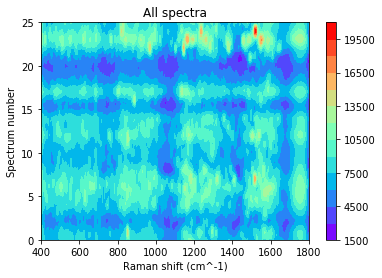

In [13]:
#view all spectra as a heat map

n = np.arange(len(spectraarray)) #create spectra sample numbers

alln = np.array([]) #create single column of all spectra numbers
allshift = np.array([]) #create single column of all shifts
alli = np.array([]) #create single column of all intensities

for i in n: #create 1D arrays for each plot dimension
    alln = np.append(alln, np.ones(len(shift))*n[i])
    allshift = np.append(allshift, shift)
    alli = np.append(alli, spectraarray[i])

# set X, Y, and Z for plot
X, Y, Z, = allshift, alln, alli

# create x-y points to be used in heatmap
xi = np.linspace(X.min(),X.max(),1000)
yi = np.linspace(Y.min(),Y.max(),1000)
# Z is a matrix of x-y values
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

zmin = np.amin(alli)
zmax = np.amax(alli)

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Spectrum number'); plt.title('All spectra'); plt.show()


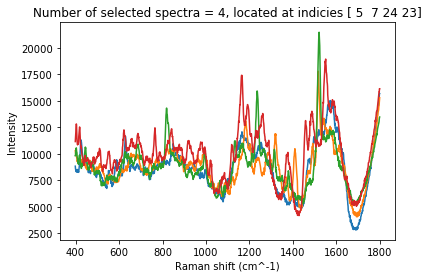

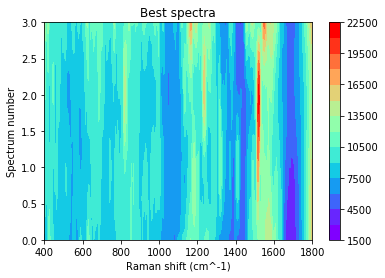

In [22]:
#find best spectra by calculating intensity variation of each spectrum

intensityvariation = np.ones(len(spectraarray))
for i in range(len(spectraarray)):
    intensityvariation[i] = np.amax(spectraarray[i]) - np.amin(spectraarray[i])

##########################################################################
nspec = 4 # how many of the highest-range spectra do you want?
##########################################################################
bestspecindicies = np.argpartition(intensityvariation, -nspec)[-nspec:] #highest-variance spectra indicies

bestspectracol = np.array([]) #create array for best spectra
for i in bestspecindicies: #scan best indicies through dataframe and collect best spectra
    bestspectracol = np.hstack((bestspectracol,spectraarray[i])) #stack all the best spectra   
bestspectra = bestspectracol.reshape(nspec,len(shift)) #reshape into matrix of best spectra

for i in range(len(bestspectra)):
    plt.plot(shift, bestspectra[i])
plt.title('Number of selected spectra = ' + format(nspec) + ', located at indicies ' +format(bestspecindicies))
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.show()

#########################################################################################

#view only best spectra as heat map

bestn = np.arange(nspec) #create spectra sample numbers
bestalln = np.array([]) #create single column of all spectra numbers
bestallshift = np.array([]) #create single column of all shifts

for i in bestn: #create 1D arrays for each plot dimension
    bestalln = np.append(bestalln, np.ones(len(shift))*bestn[i])
    bestallshift = np.append(bestallshift,shift)

# set X, Y, and Z for plot
X, Y, Z, = bestallshift, bestalln, bestspectracol

# create x-y points to be used in heatmap
xi = np.linspace(X.min(),X.max(),1000)
yi = np.linspace(Y.min(),Y.max(),1000)
# Z is a matrix of x-y values
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

zmin = np.amin(bestspectracol)
zmax = np.amax(bestspectracol)

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Spectrum number'); plt.title('Best spectra'); plt.show()


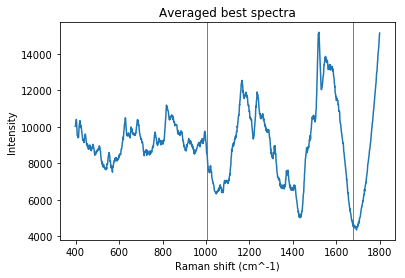

In [23]:
#average best spectra together

avgbestintensity = np.reshape(bestspectracol,(nspec,len(shift)))
avgbestintensity = np.mean(avgbestintensity,axis=0)


xcoords = [1003, 1675] #plot vertical lines at peaks of interest
for xc in xcoords:
    plt.axvline(x=xc, linewidth=.5, color = 'k')

plt.plot(shift, avgbestintensity)
plt.xlabel('Raman shift (cm^-1)'); plt.ylabel('Intensity'); plt.title('Averaged best spectra'); plt.show()


In [16]:
 # %reset -f